<a href="https://colab.research.google.com/github/Prerana-Bijekar/ML/blob/main/Practical-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

# Function to load CSV file using Pandas
def load_csv(filepath):
    return pd.read_csv(filepath)
# Load the dataset
df = load_csv('Bank_Customer_Churn.csv')
print(df.head())

# Fill missing values for numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df.drop('churn', axis=1)  # Replace 'churn' with your target column name
y = df['churn']


Saving Bank_Customer_Churn.csv to Bank_Customer_Churn (2).csv
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [ ]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
lr_model = LogisticRegression(random_state=42, class_weight='balanced')

# Standardize the data (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the Logistic Regression model (on scaled data)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Predictions for Random Forest
rf_pred = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Predictions for Logistic Regression
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC


In [ ]:
# Define a function to print evaluation metrics for each model
def evaluate_model(y_test, y_pred, y_pred_prob, model_name):
    print(f"\n{model_name} Evaluation:")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    return accuracy, precision, recall, f1, roc_auc, conf_matrix

# Evaluate Random Forest model
rf_metrics = evaluate_model(y_test, rf_pred, rf_pred_prob, "Random Forest")

# Evaluate Logistic Regression model
lr_metrics = evaluate_model(y_test, lr_pred, lr_pred_prob, "Logistic Regression")



Random Forest Evaluation:
Accuracy: 0.8615
Precision: 0.7710280373831776
Recall: 0.4198473282442748
F1 Score: 0.5436573311367381
ROC AUC: 0.8647512235749765
Confusion Matrix:
[[1558   49]
 [ 228  165]]

Logistic Regression Evaluation:
Accuracy: 0.72
Precision: 0.38514442916093533
Recall: 0.712468193384224
F1 Score: 0.5
ROC AUC: 0.7822867828568082
Confusion Matrix:
[[1160  447]
 [ 113  280]]


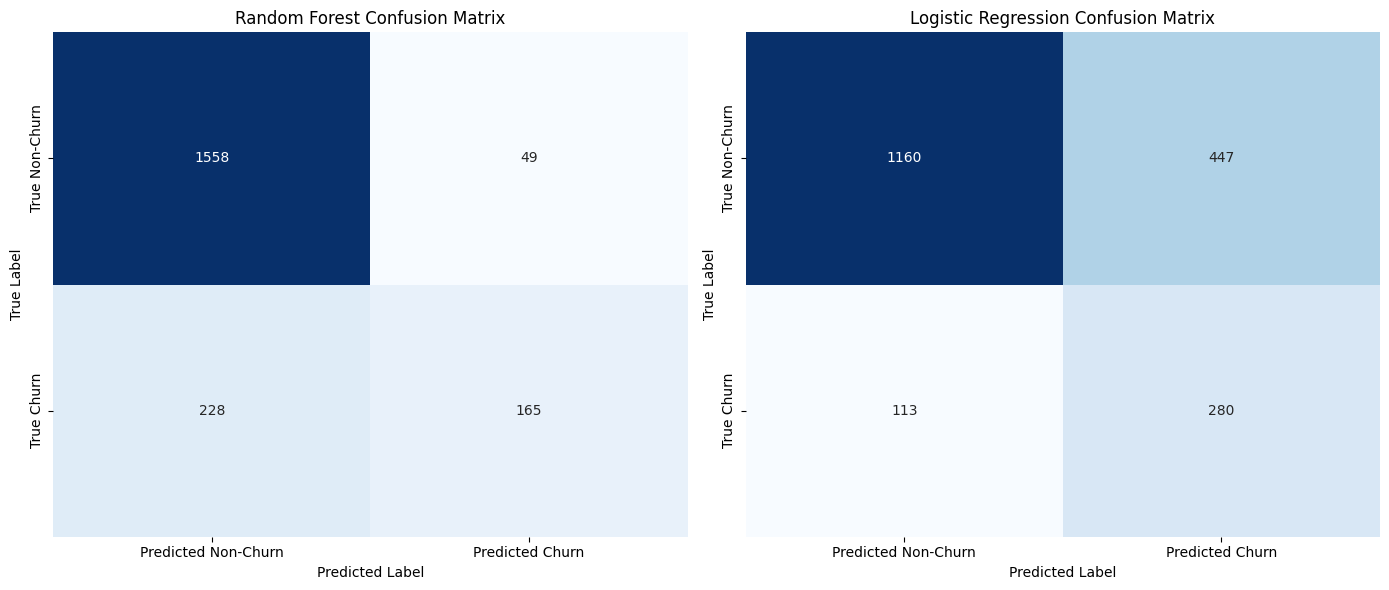

In [ ]:
# Plot the confusion matrix for both models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest Confusion Matrix
sns.heatmap(rf_metrics[5], annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False,
            xticklabels=["Predicted Non-Churn", "Predicted Churn"],
            yticklabels=["True Non-Churn", "True Churn"])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Logistic Regression Confusion Matrix
sns.heatmap(lr_metrics[5], annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False,
            xticklabels=["Predicted Non-Churn", "Predicted Churn"],
            yticklabels=["True Non-Churn", "True Churn"])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()



Random Forest Regression Evaluation:
MAE: 0.21411000000000002
MSE: 0.1015807
RMSE: 0.31871727282969775
ROC AUC: 0.8647512235749765

Logistic Regression Regression Evaluation:
MAE: 0.39262657119912864
MSE: 0.19318938103742642
RMSE: 0.4395331398625437
ROC AUC: 0.7822867828568082


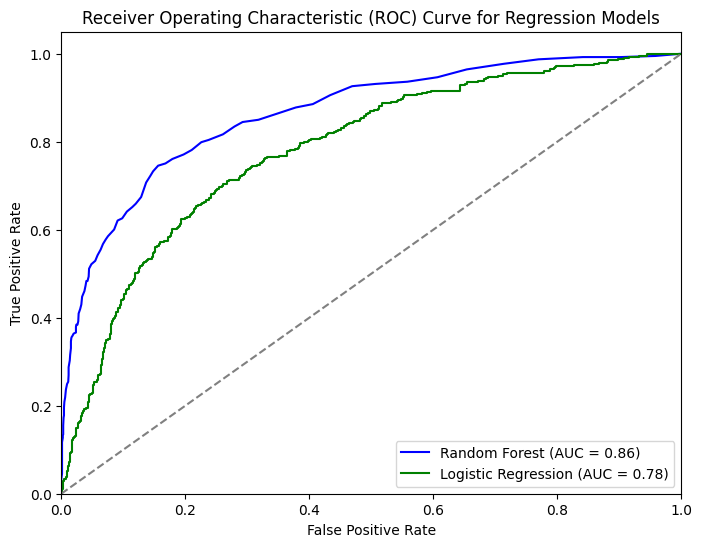

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Evaluate Regression Model Performance (MAE, MSE, RMSE, ROC-AUC)

def evaluate_regression_metrics(y_true, y_pred_prob, model_name):
    print(f"\n{model_name} Regression Evaluation:")
    mae = mean_absolute_error(y_true, y_pred_prob)
    mse = mean_squared_error(y_true, y_pred_prob)
    rmse = np.sqrt(mse)
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"ROC AUC: {roc_auc}")

    return mae, mse, rmse, roc_auc

# Evaluate Random Forest model (as regression)
rf_metrics = evaluate_regression_metrics(y_test, rf_pred_prob, "Random Forest")

# Evaluate Logistic Regression model (as regression)
lr_metrics = evaluate_regression_metrics(y_test, lr_pred_prob, "Logistic Regression")


# Plot ROC Curve Comparison for Regression Models
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest (AUC = %0.2f)' % rf_metrics[3])
plt.plot(fpr_lr, tpr_lr, color='green', label='Logistic Regression (AUC = %0.2f)' % lr_metrics[3])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Regression Models')
plt.legend(loc='lower right')
plt.show()
